In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# 导入所需的库

iris = load_iris(as_frame=True)  # 加载鸢尾花数据集，并将数据集的特征存储为DataFrame（带有列名）格式
X = iris.data[["petal length (cm)", "petal width (cm)"]].values  # 选择数据集中的两个特征作为输入特征（花瓣长度和花瓣宽度）
y = (iris.target == 0)  # 创建目标向量，将类别为0（Setosa）的样本标记为True，其他类别标记为False

per_clf = Perceptron(random_state=42)  # 创建感知器分类器对象（单层神经网络）
per_clf.fit(X, y)  # 在输入特征 X 上训练感知器分类器，使其学习如何区分类别

X_new = [[2,0.5],[3,1]]  # 创建新的输入特征，用于预测
y_pred = per_clf.predict(X_new)  # 使用训练好的感知器分类器进行预测，得到预测的类别（True 或 False）

y_pred  # 打印预测结果


array([ True, False])

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



In [5]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)



In [6]:
mlp_reg = MLPRegressor()
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

In [2]:
rmse

NameError: name 'rmse' is not defined

In [4]:
import tensorflow as tf
print(tf.__version__)


2.12.0


In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [33]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [34]:
X_train.shape
X_train.dtype

dtype('uint8')

In [35]:
X_train, X_valid, X_test = X_train/255., X_valid/255.,X_test/255.

In [36]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [37]:
class_names[y_train[0]]

'Ankle boot'

In [14]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

2023-08-31 04:31:09.953346: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [17]:
model = tf.keras.Sequential([
	tf.keras.layers.Flatten(input_shape=[28,28]),
	tf.keras.layers.Dense(300, activation='relu'),
	tf.keras.layers.Dense(100, activation='relu'),
	tf.keras.layers.Dense(10, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.layers

In [20]:
hidden1=model.layers[1]
hidden1.name

'dense_6'

In [22]:
model.get_layer('dense_6') is hidden1

True

In [24]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.05858335, -0.05721315,  0.03983851, ..., -0.04709952,
        -0.02978892,  0.01498795],
       [-0.01489524, -0.05545281,  0.00957805, ..., -0.0181118 ,
         0.02531401, -0.06666794],
       [ 0.00268496, -0.03537723,  0.0721135 , ...,  0.00015045,
        -0.06340146,  0.03114134],
       ...,
       [-0.04473403, -0.05829081, -0.04340903, ...,  0.03163319,
        -0.01712019, -0.00999982],
       [-0.06185566,  0.05640745, -0.01356545, ..., -0.02184881,
         0.02118398, -0.05586583],
       [-0.04059957, -0.00760535, -0.0583582 , ..., -0.05461311,
        -0.0629476 , -0.0666701 ]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape

(300,)

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
	optimizer='sgd',
	metrics=["accuracy"])

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(55000, 28, 28)
(55000,)
(55000, 28, 28)
(5000,)


In [38]:
history = model.fit(X_train, y_train, 
	epochs=3, 
	validation_data=(X_valid, y_valid))

Epoch 1/3
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4446 - accuracy: 0.8464 - val_loss: 0.4311 - val_accuracy: 0.8464
Epoch 2/3
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4172 - accuracy: 0.8543 - val_loss: 0.4172 - val_accuracy: 0.8472
Epoch 3/3
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3950 - accuracy: 0.8611 - val_loss: 0.3925 - val_accuracy: 0.8612


In [39]:
import matplotlib.pyplot as plt
import pandas as pd

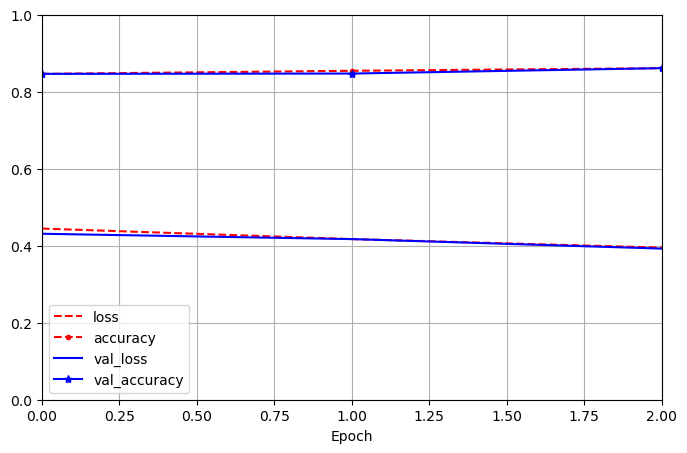

In [40]:
pd.DataFrame(history.history).plot(
	figsize=(8,5), xlim=[0,2], ylim=[0,1],grid=True, xlabel="Epoch",
	style=["r--", "r--.", "b-", "b-*"])
plt.show()


In [41]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4295 - accuracy: 0.8518


[0.4294746220111847, 0.8518000245094299]

In [42]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 99ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.24, 0.  , 0.67],
       [0.  , 0.  , 0.95, 0.  , 0.02, 0.  , 0.04, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [45]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
print(y_pred)
np.array(class_names)[y_pred]

[9 2 1]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [44]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

regression

In [47]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
	norm_layer,
	tf.keras.layers.Dense(50, activation="relu"),
	tf.keras.layers.Dense(50, activation="relu"),
	tf.keras.layers.Dense(50, activation="relu"),
	tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=3, 
	validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/3
1719/1719 [==============================] - 13s 7ms/step - loss: 8.6197 - root_mean_squared_error: 2.9360 - val_loss: 8.4190 - val_root_mean_squared_error: 2.9017
Epoch 2/3
1719/1719 [==============================] - 10s 6ms/step - loss: 8.3048 - root_mean_squared_error: 2.8818 - val_loss: 8.3919 - val_root_mean_squared_error: 2.8971
Epoch 3/3
1/1 [==============================] - 0s 217ms/step


In [49]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=x_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [69]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output,aux_output])

In [70]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError"])



In [71]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

print(X_train.shape)
print(X_train_wide.shape)
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), (y_train,y_train), epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), 
                    (y_valid,y_valid))
          )
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

(55000, 28, 28)
(55000, 5, 28)


ValueError: in user code:

    File "/home/osx/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/base_preprocessing_layer.py", line 123, in adapt_step  *
        self.update_state(data)
    File "/home/osx/anaconda3/envs/tf/lib/python3.11/site-packages/keras/layers/preprocessing/normalization.py", line 318, in update_state  **
        self.adapt_mean * existing_weight + batch_mean * batch_weight

    ValueError: Dimensions must be equal, but are 5 and 28 for '{{node add_1}} = AddV2[T=DT_FLOAT](mul, mul_1)' with input shapes: [5], [5,28].
